In [1]:
30# Import keras library. Also import some of the layers, so we do not need to
# write things like "layers.Dense", but can just write "Dense" instead
import os; 
os.environ['KERAS_BACKEND'] = 'theano'

#from keras import *
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers.noise import GaussianDropout

# Import the numpy library for matrix manipulations etc.
from numpy import *

# Set up the graphics by importing the matplotlib plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Set up a random number generator with a fixed seed, so that
# running this whole notebook repeatedly should always give
# the same result (useful for debugging)
rng = random.RandomState(23455)

import time

In [17]:
import pickle
import gzip
f = gzip.open('mnist.pkl.gz', 'rb')
training_data, validation_data, test_data = pickle.load(f,encoding='bytes')
f.close()
print(len(training_data[0]))

50000


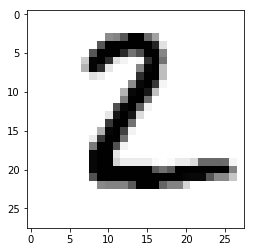

32488
14370
32985
27980
48208
5755
19181
14069
3945
14215


array([39828, 40169, 40720,  3426,  5016])

In [18]:
#training_data[0][0]
#reshape(training_data[0][0], [28,28])
#training_inputs[j,:] = reshape(tr_d[0][j], (numpixels))


plt.imshow(reshape(test_data[0][1], [28,28]),interpolation='nearest', cmap='binary')
plt.show()

#import random
group_of_items = [1,2,3,4]           # a sequence or set will work here.
num_to_select = 3                           # set the number to select here.
#list_of_random_items = random.choices(test_data,k=5)
#import numpy as np 
list_of_random_items= np.random.randint(0,50000-1,10)
for i in list_of_random_items:
    print(i)
list_of_random_items = [test_data[1] for i in list_of_random_items]
#print(list_of_random_items)
np.random.randint(0,50000-1,5)


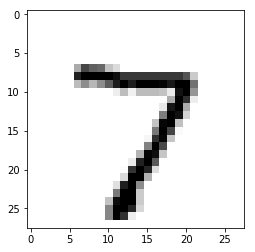

7
[1.27682662e-85 6.02405382e-12 2.36034333e-24 1.11754060e-40
 3.67569771e-65 4.00881413e-41 1.97240230e-45 1.00000000e+00
 3.65883459e-50 3.16005353e-48]
10876.591632050415
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
[7 2 2 0 4 1 9 9 5 7 0 2 9 0 1 3 9 7 3 4 9 6 7 5 4 0 7 4 0 1]


In [34]:
numoftest=0
ylayer[2][1].sum(axis=0)
plt.imshow(reshape(test_data[0][numoftest], [28,28]),interpolation='nearest', cmap='binary')
plt.show()
print(test_data[1][numoftest])


z=dot(test_data_in,weights[0])+biases[0]
ylayer[1]=z*(z>0)
dflayer[1]=(z>0)
z=dot(ylayer[1],weights[1])+biases[1]
#ylayer[2]=exp(z)*(((exp(z)).sum(axis=1))**(-1))[:]
ylayer[2]=einsum('cg,c->cg', exp(z), ((exp(z)).sum(axis=1))**(-1))
d_cost_test=(test_targets*log(ylayer[2])).sum(axis=1)

print(ylayer[2][numoftest])

targets=zeros([batchsize,LayerSizes[-1]]) 
for i in range(batchsize):
    targets[i,test_data[1][i]]=1
d_cost=(targets*log(ylayer[-1])).sum(axis=1)
print((d_cost**2).sum(axis=0))

print(test_data[1][0:30])
#print(ylayer[2][0:30].max(axis=1))
#print(np.amax(ylayer[2], axis=0, out=None, keepdims=<no value>, initial=<no value>))
result = np.where(ylayer[2][0:30] == np.amax(ylayer[2][1:30],axis=0))
print(np.argmax(ylayer[2][0:30], axis=1))


In [17]:
test_data_in=training_data[0][0:batchsize]
z=dot(test_data_in,weights[0])+biases[0]
ylayer[1]=z*(z>0)
dflayer[1]=(z>0)
z=dot(ylayer[1],weights[1])+biases[1]
#ylayer[2]=exp(z)*(((exp(z)).sum(axis=1))**(-1))[:]
ylayer[2]=einsum('cg,c->cg', exp(z), ((exp(z)).sum(axis=1))**(-1))


In [4]:
NumLayers=2
LayerSizes=[784,15,10]
weights=[random.uniform(low=-0.5,high=+0.5,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
biases=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

batchsize=400

#y_in=random.uniform(low=-0.5,high=+0.5,size=[batchsize,2])



#F=1/(1+exp(-0.7*y_in[:,0]+0.2*y_in[:,1]+0.4))

batches=800
eta=1.4



ylayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
flayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
dflayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
dw_cost=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 

ylayer[0]=training_data[0][0:batchsize]

targets=zeros([batchsize,LayerSizes[-1]]) 
for i in range(batchsize):
    targets[i,training_data[1][i]]=1


c=batchsize
d=LayerSizes[0]
f=LayerSizes[1]
g=LayerSizes[2]
#print(ylayer)
#print(ylayer[0])
#print(ylayer[-1])
#print(weights) 
#print(LayerSizes[NumLayers])
#forward

test_data_in=test_data[0][0:batchsize]
test_targets=zeros([batchsize,LayerSizes[-1]]) 
for i in range(batchsize):
    test_targets[i,test_data[1][i]]=1

import numpy as np 
for k in range(batches):   

    z=dot(test_data_in,weights[0])+biases[0]
    ylayer[1]=z*(z>0)
    dflayer[1]=(z>0)
    z=dot(ylayer[1],weights[1])+biases[1]
    #ylayer[2]=exp(z)*(((exp(z)).sum(axis=1))**(-1))[:]
    ylayer[2]=einsum('cg,c->cg', exp(z), ((exp(z)).sum(axis=1))**(-1))
    d_cost_test=(test_targets*log(ylayer[2])).sum(axis=1)
   
    
    
#     if k % 100 == 0:
#         list_of_random_items= np.random.randint(0,50000-1,batchsize)
#         ylayer[0] = [training_data[0][i] for i in list_of_random_items]

#         targets=zeros([batchsize,LayerSizes[-1]]) 
#         ii=0
#         for i in list_of_random_items:
#             targets[ii,training_data[1][i]]=1
#             ii=ii+1
   
    
    z=dot(ylayer[0],weights[0])+biases[0]
    ylayer[1]=z*(z>0)
    dflayer[1]=(z>0)
    z=dot(ylayer[1],weights[1])+biases[1]
    #ylayer[2]=exp(z)*(((exp(z)).sum(axis=1))**(-1))[:]
    ylayer[2]=einsum('cg,c->cg', exp(z), ((exp(z)).sum(axis=1))**(-1))
    
    #ylayer[j+1]=z*(z>0)
    #dflayer[2]=exp(-z)/(1+exp(-z))**2
    #print(weights[1])
    
    #dflayer[j+1]=(z>0)
    #print(ylayer[j+1])
    #print(dflayer[j+1])
    #print(ylayer[j+1])

    d_cost=(targets*log(ylayer[-1])).sum(axis=1)
    print((d_cost**2).sum(axis=0),(d_cost_test**2).sum(axis=0))

    #d_cost1=dot(ylayer[1],targets)-dot(ylayer[1],targets*ylayer[2])
    
    #d_cost0=dot(ylayer[0],targets)-dot(ylayer[1],targets*ylayer[2])

    
    d_cost1=(einsum('cf,cfg->cfg',ylayer[1], ones((c,f,g)))-einsum('cf,cg->cfg', ylayer[1], ylayer[2]))
    #print(d_cost1)
    d_cost1=(einsum('cfg,cg->cfg',(d_cost1),targets)).sum(axis=0)
    
    weights[1]+=d_cost1*eta/batchsize
    
    d_cost1b= ones((c,g))-ylayer[2]
    d_cost1b=(d_cost1b*targets).sum(axis=0)
    #biases[1]+=d_cost1b*eta/batchsize
    
    

    #d_cost0=einsum('cf,cd->cdf', dflayer[1], ylayer[0])
    #d_cost0=einsum('cdf,fg->cdfg', d_cost0, weights[1])
    #d_cost0=(d_cost0-einsum('cdfg,cg->cdfg', d_cost0, ylayer[2]))
    #d_cost0=(einsum('cdfg,cg->cdfg',(d_cost0),targets)).sum(axis=(0,3))    
    #weights[0]+=d_cost0*eta/batchsize/10
    
    d_cost0_p=einsum('cf,cd->cdf', dflayer[1], ylayer[0])
    d_cost0_int=(einsum('fg,cg->cfg',weights[1],targets)).sum(axis=(2)) 
    d_cost0=(einsum('cdf,cf->cdf', d_cost0_p, d_cost0_int)).sum(axis=(0)) 
    #d_cost0=(d_cost0-einsum('cdfg,cg->cdfg', d_cost0, ylayer[2]))
    
    d_cost0_int_p=(einsum('fg,cg->cfg',weights[1],ylayer[2])).sum(axis=(2)) 
    targets_int=targets.sum(axis=1) 
    d_cost0_int_p=einsum('cf,c->cf', d_cost0_int_p, targets_int)
    d_cost0_p=(einsum('cdf,cf->cdf', d_cost0_p, d_cost0_int_p)).sum(axis=(0)) 
    
    d_cost0=d_cost0-d_cost0_p

    #d_cost0=(einsum('cdfg,cg->cdfg',(d_cost0),targets)).sum(axis=(0,3))    
    weights[0]+=d_cost0*eta/batchsize/10
    
    
    d_cost0b_p1=einsum('cf,fg->cfg', dflayer[1], weights[1])
    d_cost0b=(einsum('cfg,cg->cfg', d_cost0b_p1, targets)).sum(axis=(0,2))
    d_cost0b_int=einsum('cfg,cg->cfg', d_cost0b_p1, ylayer[2])
    d_cost0b_int=(einsum('cfg,c->cfg', d_cost0b_int, targets_int)).sum(axis=(0,2))
    d_cost0b=d_cost0b-d_cost0b_int                                                              
                                                               
    #d_cost0b=(d_cost0b-einsum('cfg,cg->cfg', d_cost0b, ylayer[2]))
    #d_cost0b=(einsum('cfg,cg->cfg',(d_cost0b),targets)).sum(axis=(0,2))    
    #biases[0]+=d_cost0b*eta/batchsize/10    
    


10125.146673174328 10058.116115874614
4514.662086348554 5443.2191504737875
2391.3902898195547 3409.5143268744514
1861.2458093656637 2872.837405160111
1694.2539329282686 2727.944124261291
1593.6564315337737 2672.7306156969385
1535.5482818229866 2686.2380180494174
1495.7871571296605 2732.309562960375
1468.8093475036687 2786.9670176695263
1448.3310660319623 2844.688580377586
1429.850815776637 2888.2609534832577
1409.1689724960336 2930.9115544946135
1384.2978121805133 2968.886190596119
1357.2681365670107 3002.892325225309
1329.0502606871762 3037.585949328476
1291.2996039264635 3061.569436483539
1253.5523811605008 3081.4190805309145
1214.8127480635094 3090.4707235845485
1178.797735509088 3104.280162856017
1137.575075503722 3106.9262759108105
1096.3729042020057 3101.663389136783
1057.4950139271118 3096.42567444336
1020.1854776427929 3089.8326764671892
983.6649269647704 3075.9750388689554
948.354835373133 3065.8203532397947
912.3326164328703 3050.646544606893
879.2774538399558 3037.6420111508

0.6193307631973031 7780.468576286208
0.6063116726807207 7791.358194546256
0.5961282901662012 7812.684157153417
0.584863413089319 7820.437497643526
0.5742632493846686 7837.282051811507
0.5614153379685216 7851.448657401979
0.5523711439605423 7855.357694701626
0.5419881927160338 7879.670975048083
0.5333780758874616 7887.017868283259
0.5229830270194914 7902.702597794355
0.5146170756140125 7919.681638282186
0.5059823091646405 7930.459684979239
0.49773069688311333 7942.702709117163
0.4901443605146321 7969.9951018106785
0.4819778602228951 7971.953819572664
0.4744134144287292 7988.196948913785
0.4658191696847443 8000.8075883278425
0.4599524065867964 8010.805768315675
0.45095548864468515 8025.673149899816
0.4445613965564674 8025.856949439743
0.4375120494186767 8044.958071060473
0.430539485096018 8057.976677777922
0.42455577088399343 8073.334215147359
0.4182188368908949 8086.6492128146965
0.4120981647530801 8095.7861982206405
0.4062763240237303 8116.1106902226265
0.39988839930389086 8117.9090987

0.06520729901857955 9551.016297619279
0.06484945988020366 9556.436812084656
0.06433359804462854 9557.457018799394
0.06393568687913537 9564.376741664433
0.06351498345454151 9567.236191653206
0.06311920567532953 9573.179246664473
0.06273249502059378 9579.729526117608
0.062311271448268826 9586.14536293265
0.06192684456116127 9591.930327812453
0.061562495925914076 9597.943158903432
0.06120634614555911 9601.626978244956
0.06073293862805915 9604.414971392092
0.06034269831437371 9609.596493217548
0.05999556703838424 9614.834613686333
0.05960546419916183 9618.59509440006
0.05926583890747246 9627.707184728793
0.05890451044895588 9631.449218015385
0.058540570447067564 9637.005795709132
0.05818240602928198 9642.280316559612
0.057784122889807374 9642.807031340362
0.057435484478287044 9649.455980987877
0.05707797927122788 9656.081572772186
0.056753570797945276 9659.700074204411
0.056391389380609815 9665.79518323735
0.05605517014668676 9673.198612400935
0.05570380879859397 9676.120956891999
0.055380

0.021799130283107496 10431.501720597284
0.02170305420290338 10435.962462167703
0.021616996841112183 10437.949321495897
0.021526220848833377 10443.072311903288
0.021442382678027484 10443.68873399961
0.021358495872011506 10450.578304814731
0.021261376552353058 10451.143031758103
0.021168421171056315 10455.057976716009
0.021085899062761426 10459.377992433812
0.021002158170413877 10462.547629329865
0.020912679828321953 10464.573318474184
0.020831350792601427 10471.768920944198
0.020751582743781853 10471.138990760039
0.020670453051397267 10476.516695760603
0.020575932490828466 10478.27552759757
0.020484535201489296 10482.0999307426
0.020404588741191634 10485.719064487832
0.020321050684280154 10488.16550282601
0.020239321379223747 10492.427860358126
0.020161645931287234 10496.397941708357
0.020095546066676614 10500.652681764272
0.020001243675301445 10503.816919972322
0.0199222587183846 10503.786067959776
0.019838902742181447 10508.03071238998
0.019759564930670253 10512.094997841443
0.0196797

In [ ]:
    
    
    
    
    #dw=dot(transpose(ylayer[-2]),d_cost)/batchsize
    #weights[-1]+=dw*eta
    #db=d_cost.sum(axis=0)/batchsize
    #biases[-1]+=db*eta   
    for j in range(NumLayers-1):
        #print(d_cost)
        d_cost=dflayer[-j-2]*dot(d_cost,transpose(weights[-j-1]))
        #print(d_cost.sum(axis=0))
        #print(ylayer[-j-3])
        weights[-j-1]-=dw*eta
        biases[-j-1]-=db*eta  
        dw=dot(transpose(ylayer[-j-3]),d_cost)/batchsize
        #print(dw)
        #print(ylayer[-j-2])
        #print(d_cost)
        #print(weights[-j-2])
        #print(dw)
        
        db=d_cost.sum(axis=0)/batchsize
    weights[0]-=dw*eta
    biases[0]-=db*eta           
#print(weights)   
#print(biases)  
        
    #db_cost=((transpose(F)-transpose(f))*transpose(df)).sum(axis=1)/batchsize
    #weights=transpose(transpose(weights)+eta*d_cost)
    #d_cost=((transpose(F)-transpose(f))*transpose(df)).sum(axis=1)/batchsize
    #biases=transpose(transpose(biases)+eta*d_cost) 
 
def myFunc1(x0,x1):
    F1=1/(1+exp(-0.7*x0+0.2*x1+0.4))
    #print(F)
    F1=1/(1+exp(0.25*F1+0.2))
    return(F1)
def myFunc(x0,x1):
    r2=x0**2+x1**2
    return(exp(-5*r2)*abs(x1+x0))


xrange=linspace(-0.5,0.5,40)
X0,X1=meshgrid(xrange,xrange)
#myFunc(X0,X1)
plt.imshow(myFunc1(X0,X1),interpolation='nearest',origin='lower')
plt.colorbar()
plt.show()

test_batchsize=shape(X0)[0]*shape(X0)[1]
testsample=zeros([test_batchsize,2])
testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()

ylayer[0]=testsample
for j in range(NumLayers):
    z=dot(ylayer[j],weights[j])+biases[j]       
    ylayer[j+1]=1/(1+exp(-z))
    dflayer[j+1]=exp(-z)/(1+exp(-z))**2
    #ylayer[j+1]=z*(z>0)
    #dflayer[j+1]=(z>0)    

myim=plt.imshow(reshape(ylayer[NumLayers],shape(X0)),origin='lower',interpolation='none')
plt.colorbar()
plt.show()

In [ ]:

NumLayers=2
LayerSizes=[3,4,10]
weights=[random.uniform(low=-0.5,high=+0.5,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
biases=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

batchsize=2

batches=1000
eta=0.1




ylayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
flayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
dflayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
dw_cost=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 

#ylayer[0]=y_in

In [ ]:
multiply.outer(ylayer[0],ylayer[1])
#reshape(multiply.outer(ylayer[0],ylayer[1]),batchsize,3,4)
#ylayer[0]


In [ ]:
a = arange(8).reshape(2,2,2);
#a = arange(48).reshape(2,3,2,4);
a = arange(6).reshape(2,3)
b=arange(8).reshape(2,4)
c=2
d=3
f=4
einsum('cd,cf->cdf', a,b)
#ones((c, d))

#a =multiply.outer(ylayer[0],ylayer[1])
#print(a)
#a.diagonal(0,            0,           2) 
#print(a.diagonal(0,            0,           2) )
#transpose(a.diagonal(0,            0,           2) )


In [ ]:
import numpy as np

i, b, o = 3, 4, 5

A = np.ones((b, i))
B = np.ones((b, o))
np.einsum('bi,bo->bio', A, B)


In [ ]:
NumLayers=2
LayerSizes=[784,30,10]
weights=[random.uniform(low=-0.5,high=+0.5,size=[ LayerSizes[j],LayerSizes[j+1] ]) for j in range(NumLayers)]
biases=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

batchsize=1000

#y_in=random.uniform(low=-0.5,high=+0.5,size=[batchsize,2])
y_in=training_data[0][0:batchsize]
#F=1/(1+exp(-0.7*y_in[:,0]+0.2*y_in[:,1]+0.4))

batches=1
eta=0.1

targets=zeros([batchsize,LayerSizes[2]]) 
i=0
for i in range(batchsize):
    targets[i,training_data[1][i]]=1


ylayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
flayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
dflayer=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 
dw_cost=[zeros([batchsize,LayerSizes[j]]) for j in range(NumLayers+1)] 



ylayer[0]=y_in
#print(ylayer)

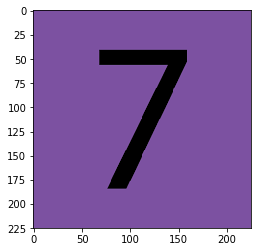

Dimensions: 151875 Total pixels:
Dimensions: (225, 225) Total pixels: 50625


In [3]:
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('7im.png')
imgplot = plt.imshow(img)
plt.show()
#width, height = img.size
print ("Dimensions:", img.size, "Total pixels:")

from PIL import Image
import os.path
filename = '7im.png'
img1 = Image.open(filename)
width, height = img1.size
print ("Dimensions:", img1.size, "Total pixels:", width * height)

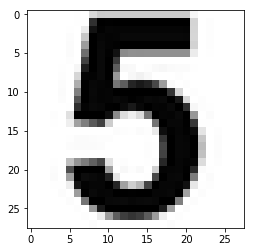

In [46]:

import PIL
from PIL import Image
#hsize = int((float(img2.size[1]) * float(wpercent)))
basewidth = 300

from resizeimage import resizeimage
#img3 = img2.resize(28,28, Image.ANTIALIAS)

plt.show()
with open('5im.jpg', 'r+b') as f:
    with Image.open(f) as image:
        cover5 = resizeimage.resize_cover(image, [28, 28])
        
imgplot = plt.imshow(cover5)
plt.show()

In [48]:
stest=test_data_in[0]

test_data_in[0]=resize(cover5,784)
test_data_in[0]=test_data_in[1]
test_data_in[0]=resize(cover,784)
resize(cover5,[28,28])


array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 254, 254, 254, 255, 255, 255, 218, 218,
        218, 202],
       [202, 202, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
        203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203, 203,
        203, 203],
       [203, 203, 203, 203, 203, 203, 203, 246, 246, 246, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 254, 254, 254, 254, 254, 254,  48,  48,
         48,   0],
       [  0,   0,   1,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 212, 212, 212, 255, 255, 255,
        253, 253, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [25